Original Multiple Regression Model:

In [1]:
import statsmodels.api as sm
import pandas as pd

#Create dataframe to data
#Remove label and index
df = pd.read_csv('40431475_features.csv')
df.drop(columns='label',inplace=True)
df.drop(columns='Index',inplace=True)

#Independent variables
#What we are trying to predict the aspect_ratio with
id_vars = df.drop(columns='aspect_ratio')
#The aspect ratio itself
aspect_ratio = df["aspect_ratio"]

#fit the model and print it
id_vars = sm.add_constant(id_vars)
model = sm.OLS(aspect_ratio, id_vars).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           aspect_ratio   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     64.98
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           2.93e-51
Time:                        21:12:14   Log-Likelihood:                 98.987
No. Observations:                 140   AIC:                            -166.0
Df Residuals:                     124   BIC:                            -118.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.48

Improved Multiple Regression Model:

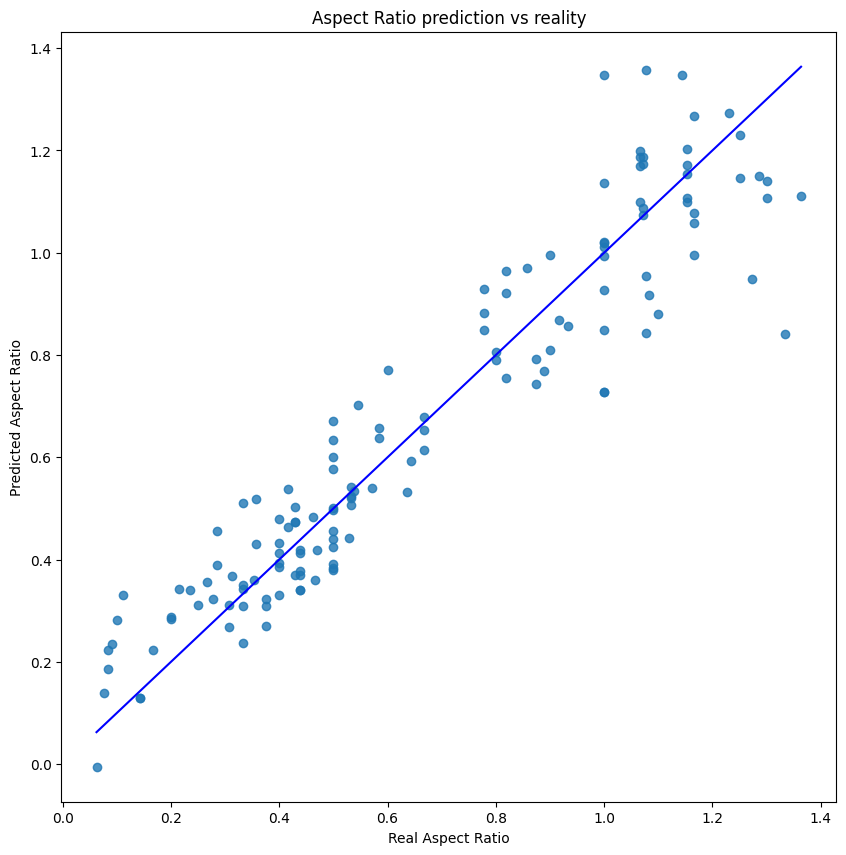

                            OLS Regression Results                            
Dep. Variable:           aspect_ratio   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     83.01
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           4.64e-54
Time:                        21:12:16   Log-Likelihood:                 98.852
No. Observations:                 140   AIC:                            -171.7
Df Residuals:                     127   BIC:                            -133.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.49

In [2]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

#Create dataframe to data
#Remove label and index
df = pd.read_csv('40431475_features.csv')
df.drop(columns='label',inplace=True)
df.drop(columns='Index',inplace=True)

#Independent variables
#What we are trying to predict the aspect_ratio with
id_vars = df.drop(columns='aspect_ratio')

#Dropping these to try and improve our adjusted R^2
#id_vars.drop(columns='rows_with_3p', inplace=True)
#id_vars.drop(columns='neigh_1', inplace=True)

id_vars.drop(columns='nr_pix', inplace=True)
id_vars.drop(columns='no_neigh_above', inplace=True)

#id_vars.drop(columns='no_neigh_vert', inplace=True)
id_vars.drop(columns='no_neigh_left', inplace=True)
#id_vars.drop(columns='eyes', inplace=True)

#The aspect ratio itself
aspect_ratio = df["aspect_ratio"]


id_vars = sm.add_constant(id_vars)
model = sm.OLS(aspect_ratio, id_vars).fit()
plt.figure(figsize=(10,10))
plt.scatter(aspect_ratio, model.fittedvalues, alpha=0.8)
plt.plot([min(aspect_ratio),max(aspect_ratio)],[min(aspect_ratio),max(aspect_ratio)],color = 'blue')
plt.xlabel("Real Aspect Ratio")
plt.ylabel("Predicted Aspect Ratio")
plt.title("Aspect Ratio prediction vs reality")
plt.show()
print(model.summary())

Logistic Regression Model:

C:\Users\ellio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


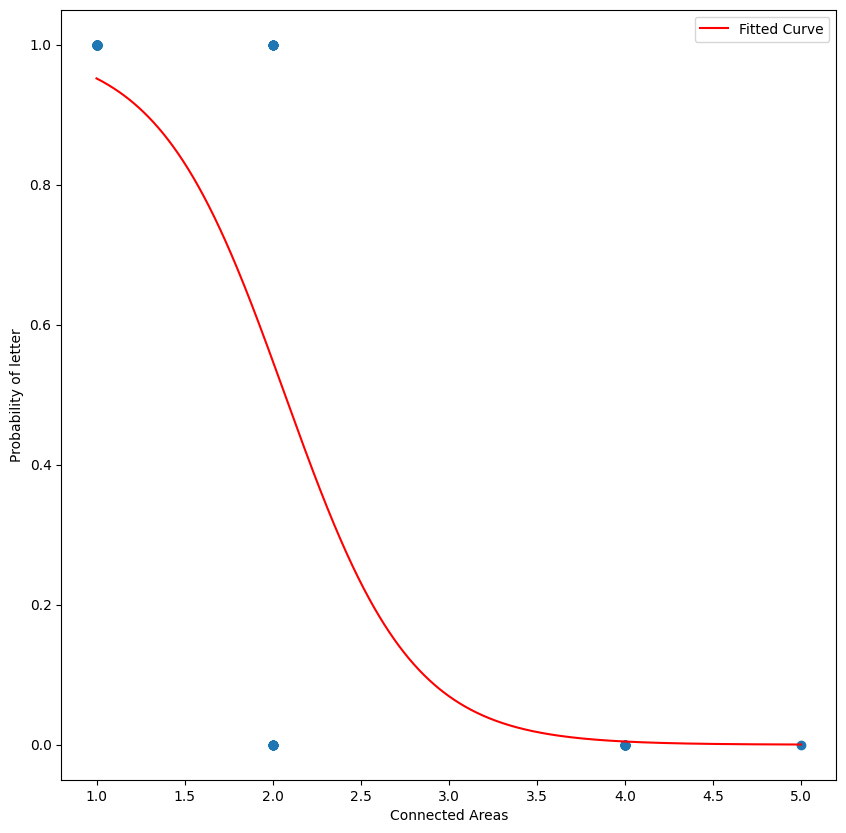

Model coef:  [[-2.78962881]]
Model Intercept:  [5.7744929]
Training Accuracy: 0.8660714285714286
Testing Accuracy: 0.8214285714285714


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#function for turning the label into
#a variable that categorizes whether an image
#is a letter or not
def letter_or_not(x):
    if x == 'sad' or x == 'smiley' or x == 'xclaim':
        return 0
    else:
        return 1

df = pd.read_csv('40431475_features.csv')
df['label'] = df['label'].apply(letter_or_not)

#Splits data 80/20 into training and testing data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
train_data = df[:112]
test_data = df[112:]

#fit a model based of the training data
x_training = train_data[['connected_areas']]
y_training = train_data['label']
model = LogisticRegression()
model.fit(x_training,y_training)

#Create a graph to represent
#the curve of the regression for visualization
x_values = np.linspace(train_data['connected_areas'].min(),train_data['connected_areas'].max(),1000)
fit_curve = model.predict_proba(x_values.reshape(-1,1))[:,1]
plt.figure(figsize=(10,10))
plt.scatter(train_data['connected_areas'], train_data['label'])
plt.plot(x_values,fit_curve,color='red',label='Fitted Curve')
plt.xlabel('Connected Areas')
plt.ylabel('Probability of letter')
plt.legend()
plt.show()

print("Model coef: ", model.coef_)
print("Model Intercept: ", model.intercept_)
#Test the model on the training data
training_predicts = (model.predict_proba(x_training)[:, 1] > 0.5).astype(int)
training_accuracy = accuracy_score(y_training, training_predicts)
print("Training Accuracy:", training_accuracy)

#Test the model on the testing data
x_testing = test_data[['connected_areas']]
y_testing = test_data['label']
test_predicts = (model.predict_proba(x_testing)[:, 1] > 0.5).astype(int)
test_accuracy = accuracy_score(y_testing, test_predicts)
print("Testing Accuracy:", test_accuracy)


Median Split Code:

In [4]:
import csv
import pandas as pd
import statistics

#pull data from csv
def read_data(feature):
    data = []
    with open('40431475_features.csv', 'r', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            data.append(float(row[feature]))
    return data

features = ["nr_pix","aspect_ratio","neigh_1"]
df = pd.DataFrame()

#iterate through the three features
split_count = 1
for feature in features:
    curr_data = read_data(feature)
    median = statistics.median(curr_data)

    #store data about the feature for letters, faces and exclamation marks
    split = []
    count = 0
    for i in range(80):
        if curr_data[i] >= median:
            count += 1
    split.append(str(count)+"/80")

    count = 0
    for i in range(80,120):
        if curr_data[i] >= median:
            count += 1
    split.append(str(count)+"/40")

    count = 0
    for i in range(120,140):
        if curr_data[i] >= median:
            count +=1
    split.append(str(count)+"/20")

    #append the split to the dataframe
    df["Split"+str(split_count)] = split
    split_count += 1

df.index = ["letters","faces","Exclamation Marks"]
print(df)

                  Split1 Split2 Split3
letters            22/80  33/80  32/80
faces              31/40  40/40  39/40
Exclamation Marks  17/20   0/20   1/20
